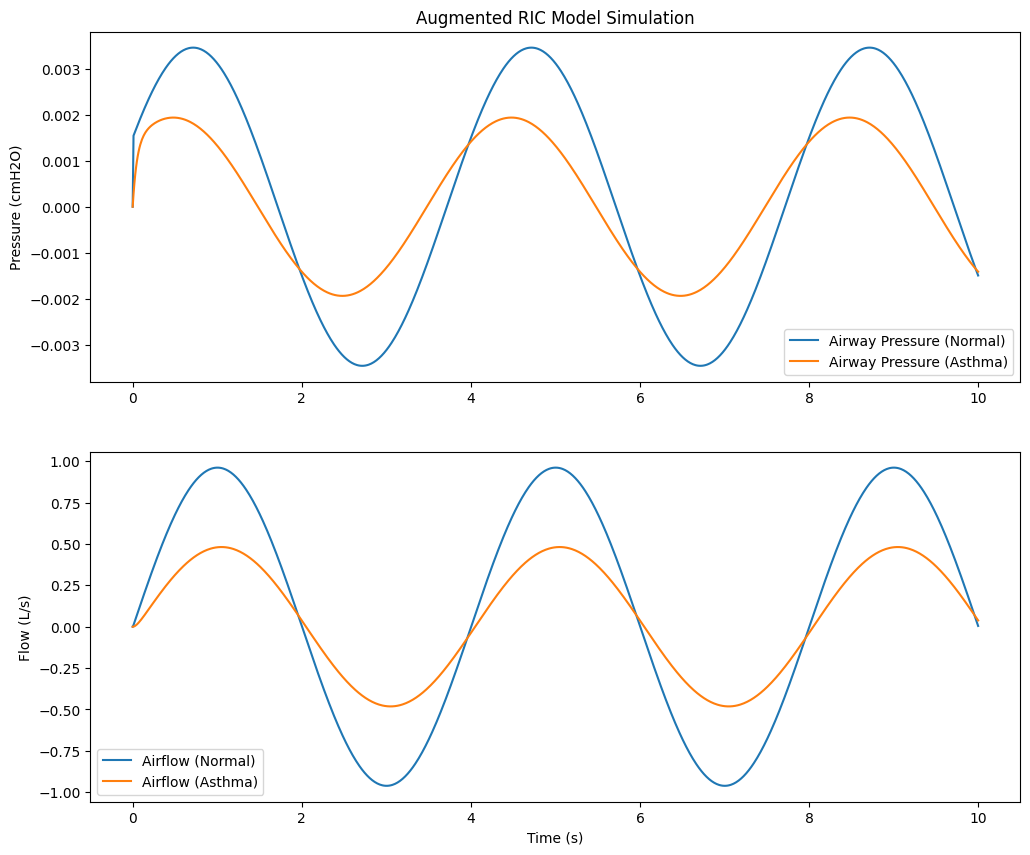

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters for the first set of augmented RIC model
V_amplitude = 0.6  # Amplitude of AC sinusoidal input in kPa
frequency = 15 / 60.0  # Frequency in Hz (converted from 15/min)
Rc1 = 0.31  # Airway resistance in cmH2O*s/L
Rp1 = 0.309  # Tissue resistance in cmH2O*s/L
I1 = 0.001  # Inertance in cmH2O*s^2/L
Cp1 = 0.512  # Lung compliance in mL/cmH2O
Ce1 = 0.002  # Inflammatory compartment compliance in mL/cmH2O

# Parameters for the second set of augmented RIC model
Rc2 = 0.371
Rp2 = 0.795
I2 = 0.002
Cp2 = 0.032
Ce2 = 0.003

# Function representing the augmented RIC model with two sets of parameters
def model(y, t, Rc, Rp, I, Cp, Ce):
    P_aw, Q = y
    dP_aw = (V_amplitude * np.sin(2 * np.pi * frequency * t) - Rc * Q - Rp * Q - P_aw / Cp + I * Q) / Ce
    dQ = P_aw / I - Q / Rp
    return [dP_aw, dQ]

# Initial conditions
initial_conditions = [0, 0]

# Time points for simulation
time = np.linspace(0, 10, 1000)

# Solve the augmented RIC model with the first set of parameters using odeint
solution1 = odeint(model, initial_conditions, time, args=(Rc1, Rp1, I1, Cp1, Ce1))

# Solve the augmented RIC model with the second set of parameters using odeint
solution2 = odeint(model, initial_conditions, time, args=(Rc2, Rp2, I2, Cp2, Ce2))

# Extract pressure and airflow for both sets of parameters
P_aw1, Q1 = solution1[:, 0], solution1[:, 1]
P_aw2, Q2 = solution2[:, 0], solution2[:, 1]

# Plotting
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(time, P_aw1, label='Airway Pressure (Normal)')
plt.plot(time, P_aw2, label='Airway Pressure (Asthma)')
plt.title('Augmented RIC Model Simulation')
plt.ylabel('Pressure (cmH2O)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, Q1, label='Airflow (Normal)')
plt.plot(time, Q2, label='Airflow (Asthma)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.legend()

plt.show()


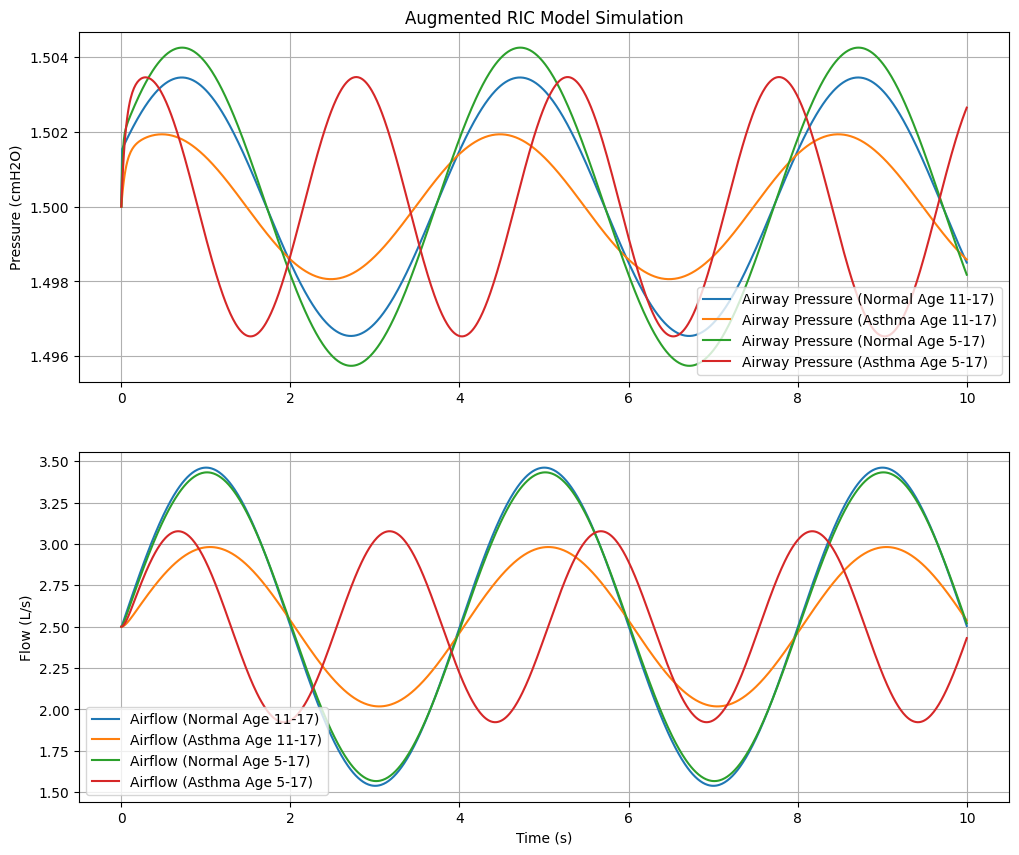

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters for the first set of augmented RIC model (normal 11-17)
V_amplitude = 0.6  # Amplitude of AC sinusoidal input in kPa
frequency1 = 15 / 60.0  # Frequency in Hz (converted from 15/min)
Rc1 = 0.31  # Airway resistance in cmH2O*s/L
Rp1 = 0.309  # Tissue resistance in cmH2O*s/L
I1 = 0.001  # Inertance in cmH2O*s^2/L
Cp1 = 0.512  # Lung compliance in mL/cmH2O
Ce1 = 0.002  # Inflammatory compartment compliance in mL/cmH2O

# Parameters for the second set of augmented RIC model (asthma 11-17)
Rc2 = 0.371
Rp2 = 0.795
I2 = 0.002
Cp2 = 0.032
Ce2 = 0.003

# Parameters for the third set of augmented RIC model (normal 5-17)

Rc3 = 0.2975
Rp3 = 0.3185
I3 = 0.0013
Cp3 = 0.1427
Ce3 = 0.003

# Parameters for the fourth set of augmented RIC model (asthma 5-17)
frequency2 = 24 / 60.0
Rc4 = 0.3473
Rp4 = 0.6058
I4 = 0.002
Cp4 = 0.0404
Ce4 = 0.0035

# Function representing the augmented RIC model with two sets of parameters
def model1(y, t, Rc, Rp, I, Cp, Ce):
    P_aw, Q = y
    dP_aw = (V_amplitude * np.sin(2 * np.pi * frequency1 * t) - Rc * Q - Rp * Q - P_aw / Cp + I * Q) / Ce
    dQ = P_aw / I - Q / Rp
    return [dP_aw, dQ]

def model2(y, t, Rc, Rp, I, Cp, Ce):
    P_aw, Q = y
    dP_aw = (V_amplitude * np.sin(2 * np.pi * frequency2 * t) - Rc * Q - Rp * Q - P_aw / Cp + I * Q) / Ce
    dQ = P_aw / I - Q / Rp
    return [dP_aw, dQ]

# Initial conditions
initial_conditions = [0, 0]

# Time points for simulation
time = np.linspace(0, 10, 1000)

# Solve the augmented RIC model with the first set of parameters using odeint
solution1 = odeint(model1, initial_conditions, time, args=(Rc1, Rp1, I1, Cp1, Ce1))

# Solve the augmented RIC model with the second set of parameters using odeint
solution2 = odeint(model1, initial_conditions, time, args=(Rc2, Rp2, I2, Cp2, Ce2))

# Solve the augmented RIC model with the second set of parameters using odeint
solution3 = odeint(model1, initial_conditions, time, args=(Rc3, Rp3, I3, Cp3, Ce3))

# Solve the augmented RIC model with the second set of parameters using odeint
solution4 = odeint(model2, initial_conditions, time, args=(Rc4, Rp4, I4, Cp4, Ce4))

# Extract pressure and airflow for both sets of parameters
P_aw1, Q1 = solution1[:, 0], solution1[:, 1]
P_aw2, Q2 = solution2[:, 0], solution2[:, 1]
P_aw3, Q3 = solution3[:, 0], solution3[:, 1]
P_aw4, Q4 = solution4[:, 0], solution4[:, 1]

# Plotting
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(time, P_aw1 + 1.5, label='Airway Pressure (Normal Age 11-17)')
plt.plot(time, P_aw2 + 1.5, label='Airway Pressure (Asthma Age 11-17)')
plt.plot(time, P_aw3 + 1.5, label='Airway Pressure (Normal Age 5-17)')
plt.plot(time, P_aw4 + 1.5, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, Q1 + 2.5, label='Airflow (Normal Age 11-17)')
plt.plot(time, Q2 + 2.5, label='Airflow (Asthma Age 11-17)')
plt.plot(time, Q3 + 2.5, label='Airflow (Normal Age 5-17)')
plt.plot(time, Q4 + 2.5, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.show()


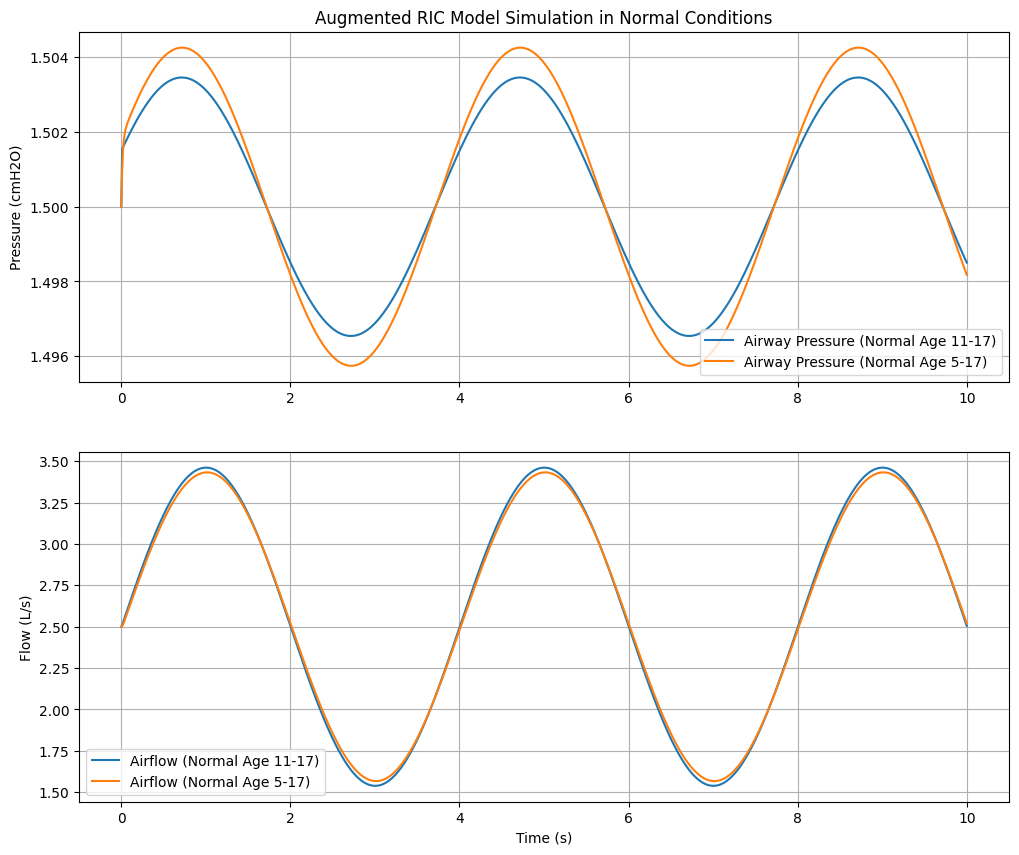

In [ ]:
# Plotting
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(time, P_aw1 + 1.5, label='Airway Pressure (Normal Age 11-17)')
# plt.plot(time, P_aw2, label='Airway Pressure (Asthma Age 11-17)')
plt.plot(time, P_aw3 + 1.5, label='Airway Pressure (Normal Age 5-17)')
# plt.plot(time, P_aw4, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation in Normal Conditions')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, Q1 + 2.5, label='Airflow (Normal Age 11-17)')
# plt.plot(time, Q2, label='Airflow (Asthma Age 11-17)')
plt.plot(time, Q3 + 2.5, label='Airflow (Normal Age 5-17)')
# plt.plot(time, Q4, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.show()


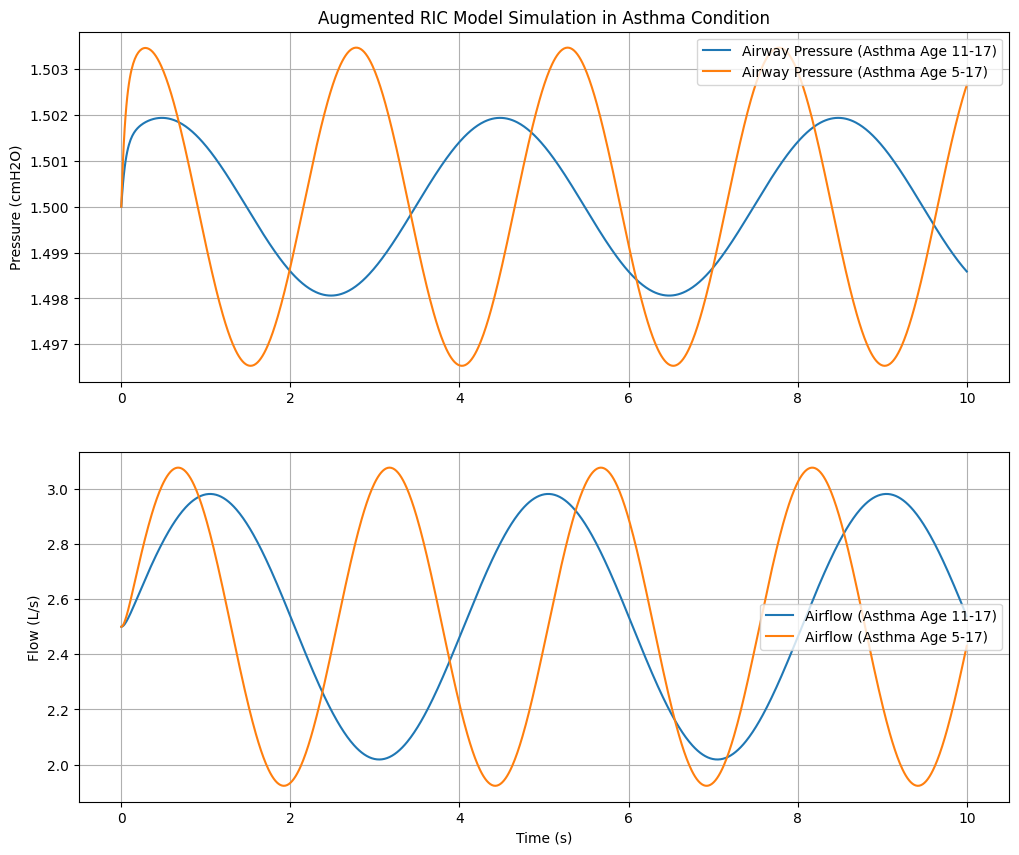

In [ ]:
# Plotting
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
# plt.plot(time, P_aw1, label='Airway Pressure (Normal Age 11-17)')
plt.plot(time, P_aw2 + 1.5, label='Airway Pressure (Asthma Age 11-17)')
# plt.plot(time, P_aw3, label='Airway Pressure (Normal Age 5-17)')
plt.plot(time, P_aw4 + 1.5, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation in Asthma Condition')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
# plt.plot(time, Q1, label='Airflow (Normal Age 11-17)')
plt.plot(time, Q2 + 2.5, label='Airflow (Asthma Age 11-17)')
# plt.plot(time, Q3, label='Airflow (Normal Age 5-17)')
plt.plot(time, Q4 + 2.5, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.show()


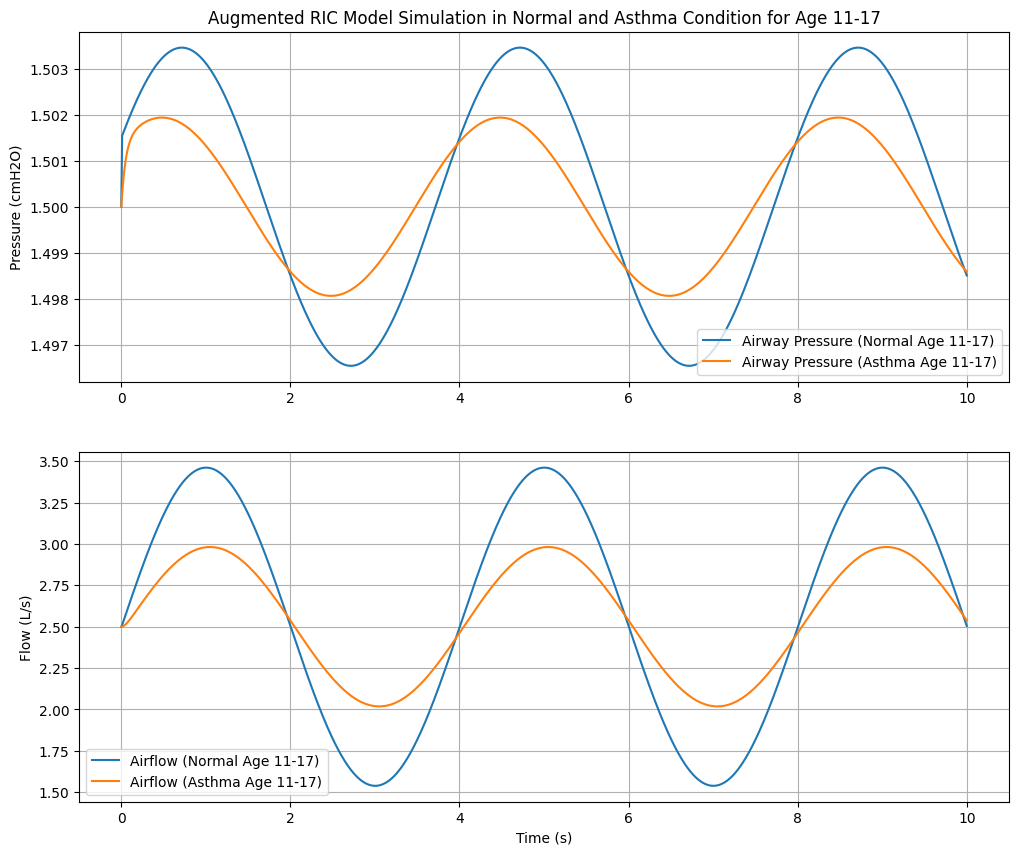

In [ ]:
# Plotting
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(time, P_aw1 + 1.5, label='Airway Pressure (Normal Age 11-17)')
plt.plot(time, P_aw2 + 1.5, label='Airway Pressure (Asthma Age 11-17)')
# plt.plot(time, P_aw3, label='Airway Pressure (Normal Age 5-17)')
# plt.plot(time, P_aw4, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation in Normal and Asthma Condition for Age 11-17')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, Q1 + 2.5, label='Airflow (Normal Age 11-17)')
plt.plot(time, Q2 + 2.5, label='Airflow (Asthma Age 11-17)')
# plt.plot(time, Q3, label='Airflow (Normal Age 5-17)')
# plt.plot(time, Q4, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.show()


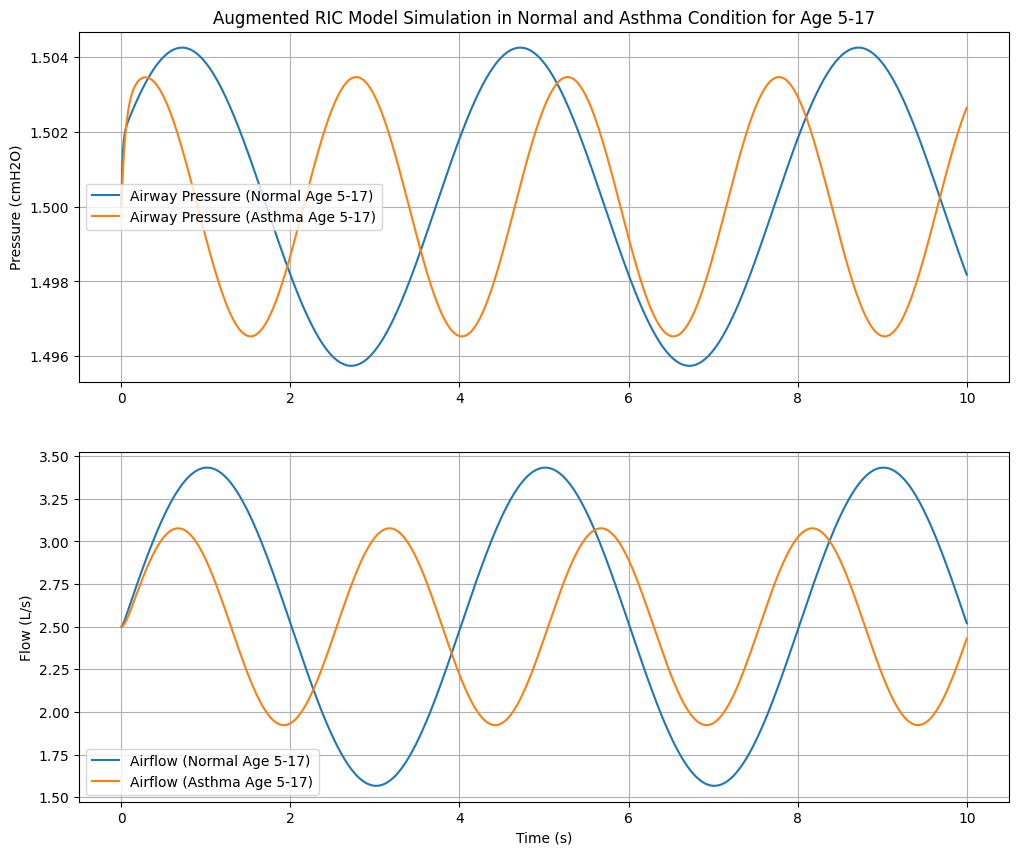

In [ ]:
# Plotting
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
# plt.plot(time, P_aw1, label='Airway Pressure (Normal Age 11-17)')
# plt.plot(time, P_aw2, label='Airway Pressure (Asthma Age 11-17)')
plt.plot(time, P_aw3 + 1.5, label='Airway Pressure (Normal Age 5-17)')
plt.plot(time, P_aw4 + 1.5, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation in Normal and Asthma Condition for Age 5-17')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
# plt.plot(time, Q1, label='Airflow (Normal Age 11-17)')
# plt.plot(time, Q2, label='Airflow (Asthma Age 11-17)')
plt.plot(time, Q3 + 2.5, label='Airflow (Normal Age 5-17)')
plt.plot(time, Q4 + 2.5, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.show()


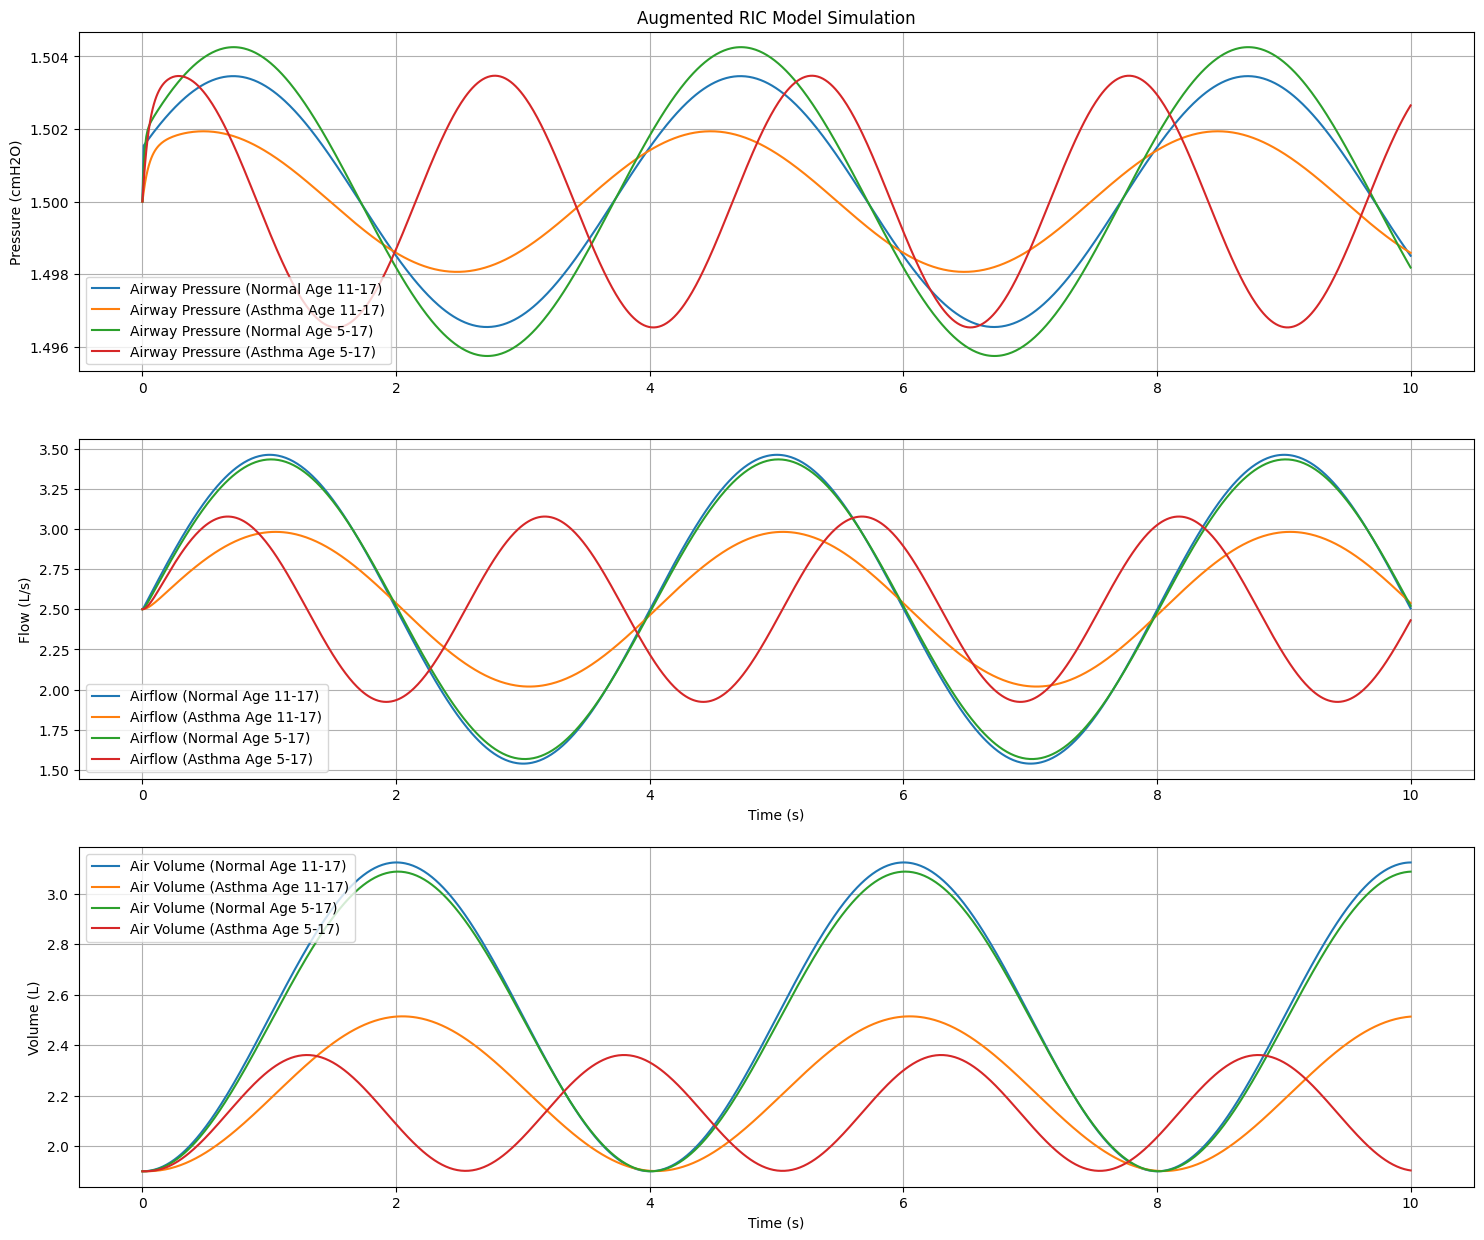

In [ ]:
from scipy.integrate import cumtrapz

# Calculate cumulative volume from airflow
V1 = cumtrapz(Q1, time, initial=0)
V2 = cumtrapz(Q2, time, initial=0)
V3 = cumtrapz(Q3, time, initial=0)
V4 = cumtrapz(Q4, time, initial=0)


# Plotting
plt.figure(figsize=(18, 15))
plt.subplot(3, 1, 1)
plt.plot(time, P_aw1 + 1.5, label='Airway Pressure (Normal Age 11-17)')
plt.plot(time, P_aw2 + 1.5, label='Airway Pressure (Asthma Age 11-17)')
plt.plot(time, P_aw3 + 1.5, label='Airway Pressure (Normal Age 5-17)')
plt.plot(time, P_aw4 + 1.5, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, Q1 + 2.5, label='Airflow (Normal Age 11-17)')
plt.plot(time, Q2 + 2.5, label='Airflow (Asthma Age 11-17)')
plt.plot(time, Q3 + 2.5, label='Airflow (Normal Age 5-17)')
plt.plot(time, Q4 + 2.5, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, V1 + 1.9, label='Air Volume (Normal Age 11-17)')
plt.plot(time, V2 + 1.9, label='Air Volume (Asthma Age 11-17)')
plt.plot(time, V3 + 1.9, label='Air Volume (Normal Age 5-17)')
plt.plot(time, V4 + 1.9, label='Air Volume (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Volume (L)')
plt.grid(True)
plt.legend()

plt.show()


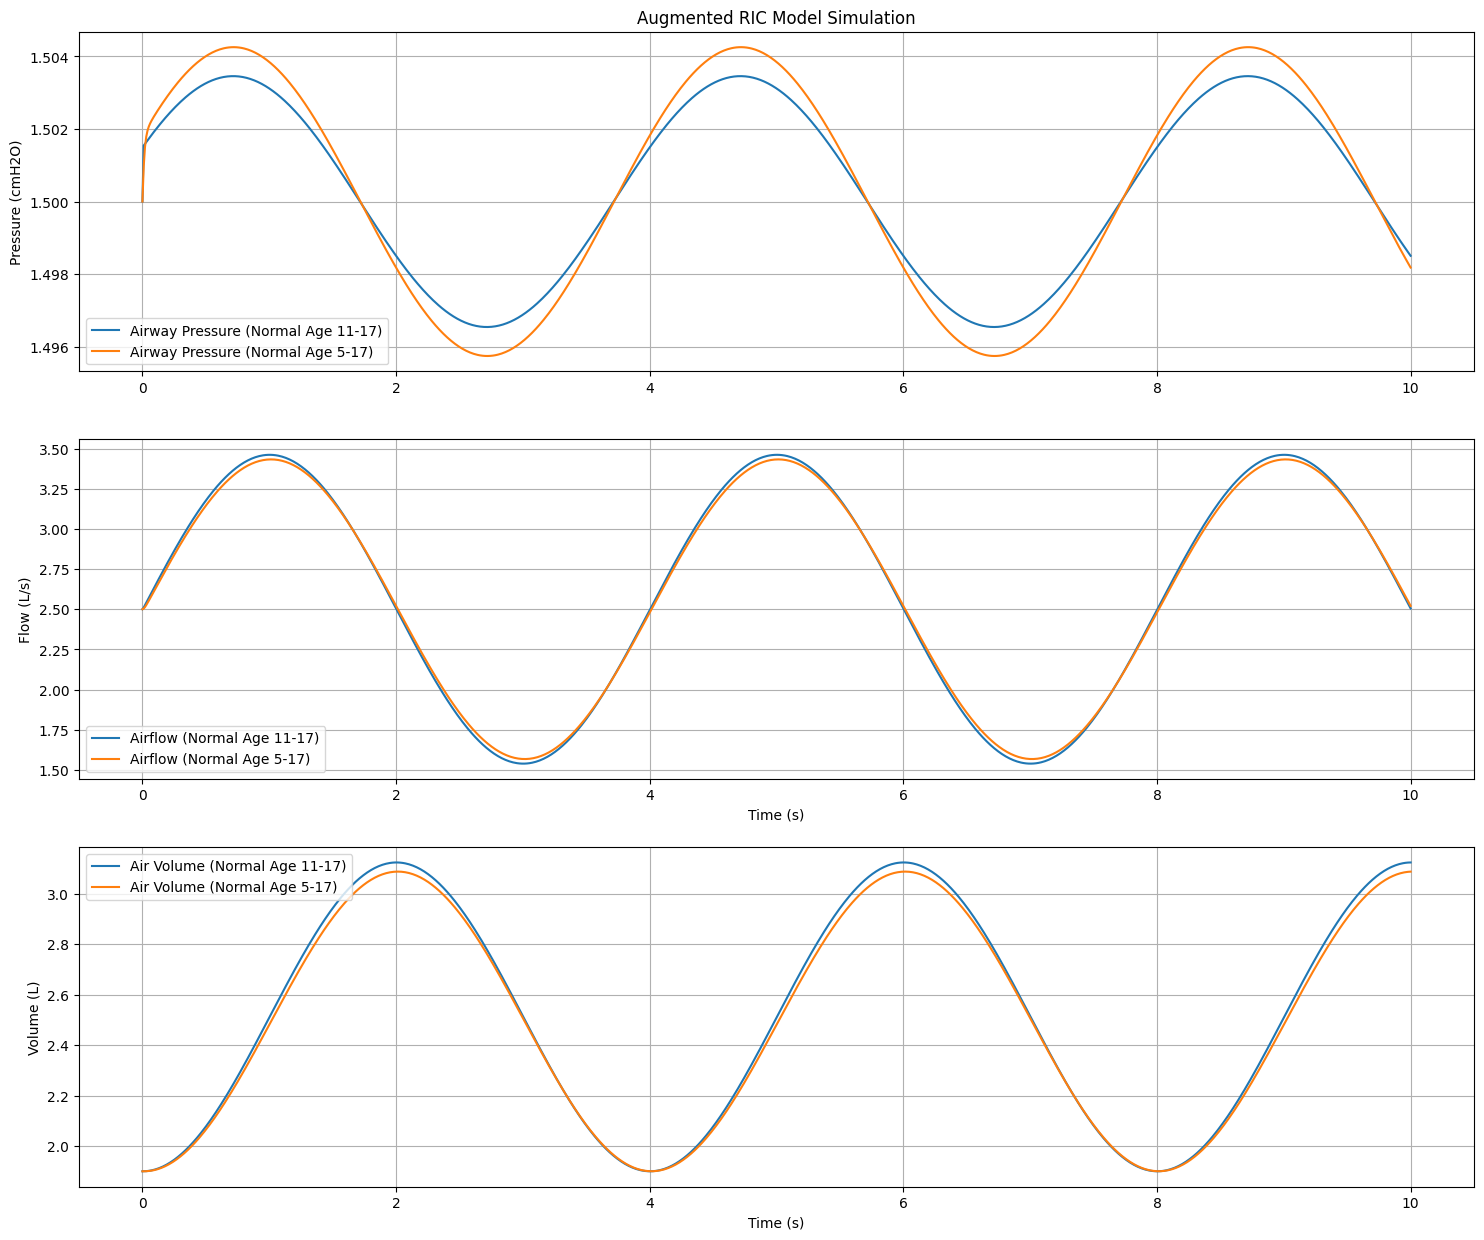

In [ ]:
# Plotting
plt.figure(figsize=(18, 15))
plt.subplot(3, 1, 1)
plt.plot(time, P_aw1 + 1.5, label='Airway Pressure (Normal Age 11-17)')
# plt.plot(time, P_aw2 + 1.5, label='Airway Pressure (Asthma Age 11-17)')
plt.plot(time, P_aw3 + 1.5, label='Airway Pressure (Normal Age 5-17)')
# plt.plot(time, P_aw4 + 1.5, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, Q1 + 2.5, label='Airflow (Normal Age 11-17)')
# plt.plot(time, Q2 + 2.5, label='Airflow (Asthma Age 11-17)')
plt.plot(time, Q3 + 2.5, label='Airflow (Normal Age 5-17)')
# plt.plot(time, Q4 + 2.5, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, V1 + 1.9, label='Air Volume (Normal Age 11-17)')
# plt.plot(time, V2 + 2.5, label='Air Volume (Asthma Age 11-17)')
plt.plot(time, V3 + 1.9, label='Air Volume (Normal Age 5-17)')
# plt.plot(time, V4 + 2.5, label='Air Volume (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Volume (L)')
plt.grid(True)
plt.legend()

plt.show()

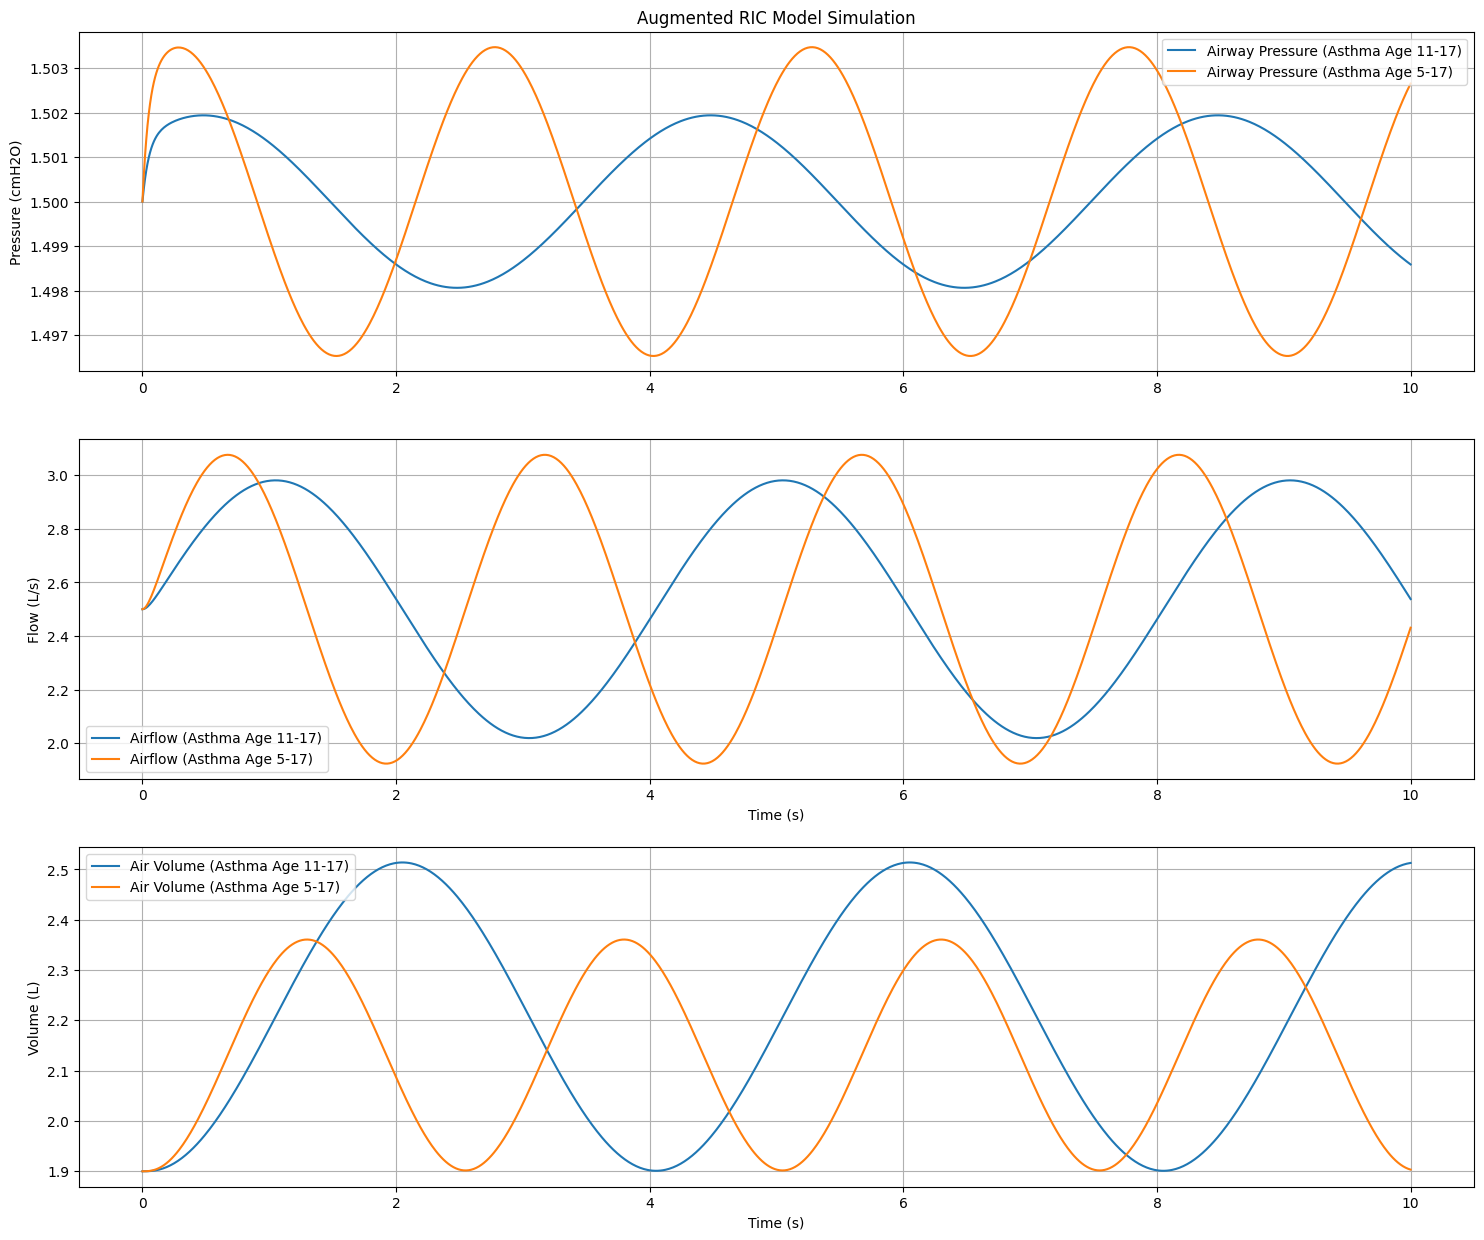

In [ ]:
# Plotting
plt.figure(figsize=(18, 15))
plt.subplot(3, 1, 1)
# plt.plot(time, P_aw1 + 1.5, label='Airway Pressure (Normal Age 11-17)')
plt.plot(time, P_aw2 + 1.5, label='Airway Pressure (Asthma Age 11-17)')
# plt.plot(time, P_aw3 + 1.5, label='Airway Pressure (Normal Age 5-17)')
plt.plot(time, P_aw4 + 1.5, label='Airway Pressure (Asthma Age 5-17)')
plt.title('Augmented RIC Model Simulation')
plt.ylabel('Pressure (cmH2O)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
# plt.plot(time, Q1 + 2.5, label='Airflow (Normal Age 11-17)')
plt.plot(time, Q2 + 2.5, label='Airflow (Asthma Age 11-17)')
# plt.plot(time, Q3 + 2.5, label='Airflow (Normal Age 5-17)')
plt.plot(time, Q4 + 2.5, label='Airflow (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/s)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
# plt.plot(time, V1 + 2.5, label='Air Volume (Normal Age 11-17)')
plt.plot(time, V2 + 1.9, label='Air Volume (Asthma Age 11-17)')
# plt.plot(time, V3 + 2.5, label='Air Volume (Normal Age 5-17)')
plt.plot(time, V4 + 1.9, label='Air Volume (Asthma Age 5-17)')
plt.xlabel('Time (s)')
plt.ylabel('Volume (L)')
plt.grid(True)
plt.legend()

plt.show()